In [1]:
import h5py
import pandas as pd
import squidpy

In [2]:
binned = h5py.File('data/colon_cancer/')

IsADirectoryError: [Errno 21] Unable to synchronously open file (file read failed: time = Sun Jun 16 20:26:35 2024
, filename = 'data/colon_cancer/', file descriptor = 59, errno = 21, error message = 'Is a directory', buf = 0x7ffd5e39fce8, total read size = 8, bytes this sub-read = 8, bytes actually read = 18446744073709551615, offset = 0)

In [2]:
feature_slice = h5py.File('data/Visium_HD_Human_Lung_Cancer_feature_slice.h5')

In [4]:
feature_slice.keys()

<KeysViewHDF5 ['feature_slices', 'features', 'images', 'masks', 'reads', 'secondary_analysis', 'umis']>

In [ ]:
feature_slice.keys()

In [4]:
ls data/colon_cancer/binned_outputs/square_002um

filtered_feature_bc_matrix/     raw_feature_bc_matrix.h5*
filtered_feature_bc_matrix.h5*  raw_probe_bc_matrix.h5*
raw_feature_bc_matrix/          spatial/


In [3]:
import squidpy
from pathlib import Path

v = squidpy.read.visium(
    'data/colon_cancer/binned_outputs/square_016um/', 
     source_image_path='data/colon_cancer/Visium_HD_Human_Colon_Cancer_tissue_image.btf',
     #counts_file='raw_feature_bc_matrix/matrix.mtx.gz',
     #library_id='library_id'
     )

/home/cosmo/anaconda3/envs/10x_spatial_AI/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cosmo/anaconda3/envs/10x_spatial_AI/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
ls data/colon_cancer/binned_outputs/square_016um/

analysis/                       raw_feature_bc_matrix/
filtered_feature_bc_matrix/     raw_feature_bc_matrix.h5*
filtered_feature_bc_matrix.h5*  spatial/


In [8]:
v

AnnData object with n_obs × n_vars = 137051 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [9]:
v.obs

,in_tissue,array_row,array_col
s_016um_00052_00082-1,1,52,82
s_016um_00010_00367-1,1,10,367
s_016um_00163_00399-1,1,163,399
s_016um_00238_00388-1,1,238,388
s_016um_00144_00175-1,1,144,175
...,...,...,...
s_016um_00375_00231-1,1,375,231
s_016um_00109_00223-1,1,109,223
s_016um_00039_00175-1,1,39,175
s_016um_00037_00193-1,1,37,193


In [65]:
dir(v.obsm)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_actual_class',
 '_allow_df',
 '_axis',
 '_data',
 '_dimnames',
 '_ipython_key_completions_',
 '_parent',
 '_validate_value',
 '_view',
 '_view_class',
 'as_dict',
 'attrname',
 'axes',
 'clear',
 'copy',
 'dim',
 'dim_names',
 'flipped',
 'get',
 'is_view',
 'items',
 'keys',
 'parent',
 'pop',
 'popitem',
 'setdefault',
 'to_df',
 'update',
 'values']

In [76]:
v.obsm['spatial'].shape

(137051, 2)

In [10]:
v.var

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38
...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38
MT-ND4,ENSG00000198886,Gene Expression,GRCh38
MT-ND5,ENSG00000198786,Gene Expression,GRCh38
MT-ND6,ENSG00000198695,Gene Expression,GRCh38


In [11]:
# fullres coordinates appear to be stored here still
# according to squidpy src, each row in this array is (pxl_col_in_fullres, pxl_row_in_fullres)
v.obsm['spatial'].shape

(137051, 2)

In [12]:
v.obsm['spatial']

array([[45452.96013311, 19378.73275021],
       [62067.4943537 , 22056.09976262],
       [64052.28703576, 13140.39317637],
       ...,
       [50873.78549578, 20210.9797556 ],
       [51923.51996361, 20341.92282103],
       [59948.8970146 , 14196.13270409]])

In [13]:
v.uns

OrderedDict([('spatial',
              {'Visium_HD_Human_Colon_Cancer': {'metadata': {'chemistry_description': 'Visium HD v1',
                 'software_version': 'spaceranger-3.0.0',
                 'source_image_path': '/home/cosmo/10x_spatial_AI/data/colon_cancer/Visium_HD_Human_Colon_Cancer_tissue_image.btf'},
                'images': {'hires': array([[[237, 237, 240],
                         [237, 236, 240],
                         [237, 237, 240],
                         ...,
                         [237, 236, 240],
                         [237, 236, 241],
                         [237, 236, 241]],
                 
                        [[237, 237, 241],
                         [237, 236, 240],
                         [237, 236, 240],
                         ...,
                         [237, 237, 240],
                         [237, 237, 241],
                         [237, 236, 241]],
                 
                        [[237, 236, 240],
                   

In [15]:
# spot_diameter_fullres is the conversion factor from row/column number back to pixels
v.uns['spatial']['Visium_HD_Human_Colon_Cancer']['scalefactors']

{'spot_diameter_fullres': 58.417196833905315,
 'bin_size_um': 16.0,
 'microns_per_pixel': 0.27389195078106876,
 'regist_target_img_scalef': 0.07973422,
 'tissue_lowres_scalef': 0.007973422,
 'fiducial_diameter_fullres': 1204.854684699297,
 'tissue_hires_scalef': 0.07973422}

In [77]:
tp = 'data/colon_cancer/binned_outputs/square_016um/spatial/tissue_positions.parquet'
df=pd.read_parquet(tp)
df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,s_016um_00000_00000-1,1,0,0,22352.723279,40624.276539
1,s_016um_00000_00001-1,1,0,1,22353.507390,40682.662627
2,s_016um_00000_00002-1,1,0,2,22354.291503,40741.048834
3,s_016um_00000_00003-1,1,0,3,22355.075617,40799.435159
4,s_016um_00000_00004-1,0,0,4,22355.859733,40857.821603
...,...,...,...,...,...,...
175556,s_016um_00418_00414-1,0,418,414,-1739.790645,65119.783034
175557,s_016um_00418_00415-1,0,418,415,-1739.031212,65178.179417
175558,s_016um_00418_00416-1,0,418,416,-1738.271778,65236.575919
175559,s_016um_00418_00417-1,0,418,417,-1737.512343,65294.972540


In [79]:
df[df.array_col==0]

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,s_016um_00000_00000-1,1,0,0,22352.723279,40624.276539
419,s_016um_00001_00000-1,1,1,0,22294.294759,40625.065572
838,s_016um_00002_00000-1,1,2,0,22235.866427,40625.854602
1257,s_016um_00003_00000-1,1,3,0,22177.438282,40626.643630
1676,s_016um_00004_00000-1,1,4,0,22119.010325,40627.432655
...,...,...,...,...,...,...
173466,s_016um_00414_00000-1,0,414,0,-1820.660456,40950.719762
173885,s_016um_00415_00000-1,0,415,0,-1879.011406,40951.507748
174304,s_016um_00416_00000-1,0,416,0,-1937.362169,40952.295731
174723,s_016um_00417_00000-1,0,417,0,-1995.712745,40953.083711


In [7]:
df[df.barcode=='s_016um_00052_00082-1']

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
21870,s_016um_00052_00082-1,1,52,82,19378.73275,45452.960133


In [13]:
22353.507390-22352.723279, 40682.662627-40624.276539

(0.7841109999972105, 58.38608799999929)

In [14]:
58.417196833905315/16.0

3.651074802119082

In [12]:
coords = df[df.in_tissue==1][['pxl_row_in_fullres', 'pxl_col_in_fullres']]
coords.min(), coords.max()

(pxl_row_in_fullres    -1887.091347
 pxl_col_in_fullres    40624.276539
 dtype: float64,
 pxl_row_in_fullres    22680.620735
 pxl_col_in_fullres    65266.450528
 dtype: float64)

In [8]:
coords = df[['array_row', 'array_col']]
coords.min(), coords.max()

(array_row    0
 array_col    0
 dtype: uint32,
 array_row    418
 array_col    418
 dtype: uint32)

In [32]:
418*418

174724

In [6]:
21187.058355-21236.291085

-49.23272999999972

In [16]:
df.columns

Index(['barcode', 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres',
       'pxl_col_in_fullres'],
      dtype='object')

In [10]:
#pip install 

In [39]:
from h5_data import get_matrix_from_h5
filtered_hs = '/home/cosmo/10x_spatial_AI/data/colon_cancer/binned_outputs/square_016um/filtered_feature_bc_matrix.h5'
filtered_matrix_h5 = get_matrix_from_h5(filtered_hs)

In [41]:
filtered_matrix_h5.matrix.shape

(18085, 137051)

In [3]:
dir(filtered_matrix_h5)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_make',
 '_replace',
 'barcodes',
 'count',
 'feature_ref',
 'index',
 'matrix']

In [5]:
filtered_matrix_h5.count??

Signature: filtered_matrix_h5.count(value, /)
Docstring: Return number of occurrences of value.
Type:      builtin_function_or_method

In [13]:
filtered_matrix_h5.matrix

<18085x137051 sparse matrix of type '<class 'numpy.int32'>'
	with 174718343 stored elements in Compressed Sparse Column format>

In [20]:
vec = filtered_matrix_h5.matrix.T[0,:].toarray()
vec.sum()

43

In [22]:
filtered_matrix_h5.matrix.shape

(18085, 137051)

In [ ]:
filtered_matrix_h5.matrix

In [12]:
filtered_matrix_h5.barcodes.shape, filtered_matrix_h5.barcodes

((137051,),
 array([b's_016um_00052_00082-1', b's_016um_00010_00367-1',
        b's_016um_00163_00399-1', ..., b's_016um_00039_00175-1',
        b's_016um_00037_00193-1', b's_016um_00144_00329-1'], dtype='|S21'))

In [8]:
filtered_matrix_h5.feature_ref

{'id': array([b'ENSG00000187634', b'ENSG00000188976', b'ENSG00000187961', ...,
        b'ENSG00000198786', b'ENSG00000198695', b'ENSG00000198727'],
       dtype='|S15'),
 'name': array([b'SAMD11', b'NOC2L', b'KLHL17', ..., b'MT-ND5', b'MT-ND6',
        b'MT-CYB'], dtype='|S11'),
 'feature_type': array([b'Gene Expression', b'Gene Expression', b'Gene Expression', ...,
        b'Gene Expression', b'Gene Expression', b'Gene Expression'],
       dtype='|S15'),
 'genome': array([b'GRCh38', b'GRCh38', b'GRCh38', ..., b'GRCh38', b'GRCh38',
        b'GRCh38'], dtype='|S6')}

In [9]:
import pandas as pd
pd.DataFrame(filtered_matrix_h5.feature_ref)

,id,name,feature_type,genome
0,b'ENSG00000187634',b'SAMD11',b'Gene Expression',b'GRCh38'
1,b'ENSG00000188976',b'NOC2L',b'Gene Expression',b'GRCh38'
2,b'ENSG00000187961',b'KLHL17',b'Gene Expression',b'GRCh38'
3,b'ENSG00000187583',b'PLEKHN1',b'Gene Expression',b'GRCh38'
4,b'ENSG00000187642',b'PERM1',b'Gene Expression',b'GRCh38'
...,...,...,...,...
18080,b'ENSG00000212907',b'MT-ND4L',b'Gene Expression',b'GRCh38'
18081,b'ENSG00000198886',b'MT-ND4',b'Gene Expression',b'GRCh38'
18082,b'ENSG00000198786',b'MT-ND5',b'Gene Expression',b'GRCh38'
18083,b'ENSG00000198695',b'MT-ND6',b'Gene Expression',b'GRCh38'


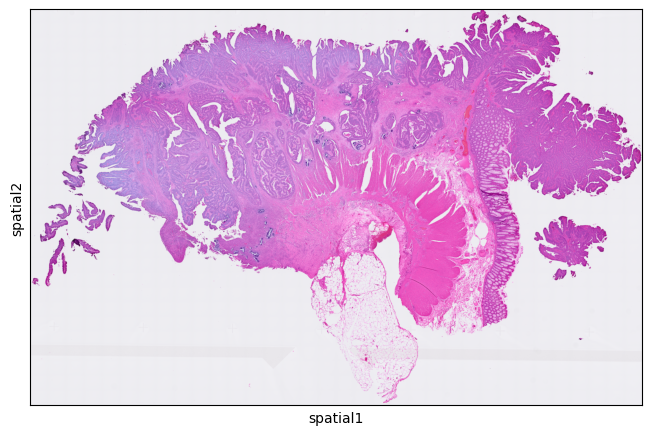

In [22]:
squidpy.pl.spatial_scatter(v)

In [17]:
v

AnnData object with n_obs × n_vars = 137051 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [42]:
v.obsm['spatial']

array([[45452.96013311, 19378.73275021],
       [62067.4943537 , 22056.09976262],
       [64052.28703576, 13140.39317637],
       ...,
       [50873.78549578, 20210.9797556 ],
       [51923.51996361, 20341.92282103],
       [59948.8970146 , 14196.13270409]])

In [46]:
v.obsm['spatial'].shape

(137051, 2)

In [45]:
v.obs.shape

(137051, 3)

In [44]:
v.obsm['spatial']=filtered_matrix_h5.matrix

ValueError: Value passed for key 'spatial' is of incorrect shape. Values of obsm must match dimensions ('obs',) of parent. Value had shape (18085,) while it should have had (137051,).

In [33]:
v.var

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38
...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38
MT-ND4,ENSG00000198886,Gene Expression,GRCh38
MT-ND5,ENSG00000198786,Gene Expression,GRCh38
MT-ND6,ENSG00000198695,Gene Expression,GRCh38


In [28]:
v.var.iloc[2326]

gene_ids         ENSG00000211592
feature_types    Gene Expression
genome                    GRCh38
Name: IGKC, dtype: object

In [62]:
v.obs

,in_tissue,array_row,array_col
s_016um_00052_00082-1,1,52,82
s_016um_00010_00367-1,1,10,367
s_016um_00163_00399-1,1,163,399
s_016um_00238_00388-1,1,238,388
s_016um_00144_00175-1,1,144,175
...,...,...,...
s_016um_00375_00231-1,1,375,231
s_016um_00109_00223-1,1,109,223
s_016um_00039_00175-1,1,39,175
s_016um_00037_00193-1,1,37,193


In [87]:
dir(v)

['T',
 'X',
 '_BACKED_ATTRS',
 '_H5_ALIASES',
 '_H5_ALIASES_NAMES',
 '_X',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adata_ref',
 '_check_dimensions',
 '_check_uniqueness',
 '_clean_up_old_format',
 '_gen_repr',
 '_get_X',
 '_get_and_delete_multicol_field',
 '_get_obs_array',
 '_get_var_array',
 '_has_X',
 '_init_as_actual',
 '_init_as_view',
 '_inplace_subset_obs',
 '_inplace_subset_var',
 '_is_view',
 '_layers',
 '_mutated_copy',
 '_normalize_indices',
 '_obs',
 '_obsm',
 '_obsp',
 '_oidx',
 '_prep_dim_index',
 '_raw',
 '_remove_unused_categories',
 '_sanitize',
 '_s

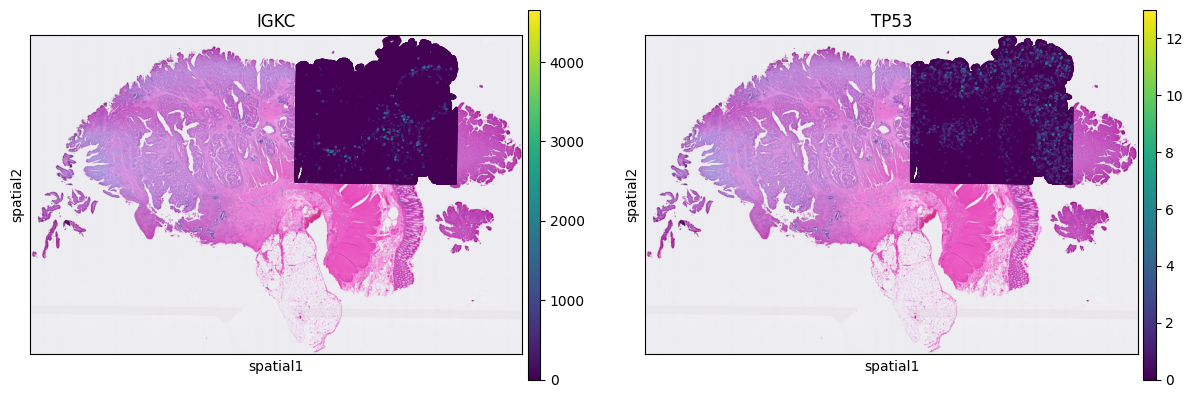

In [84]:
squidpy.pl.spatial_scatter(v, 
                           color=["IGKC","TP53"],
                           #color=["IGKC"],
                           size=7,
                           #crop_coord=[(1800, 40000, 22680, 60000)],
                           #crop_coord=[(0,100,0,100)]
                          )

KeyError: 'Could not find key IGKCd in .var_names or .obs.columns.'

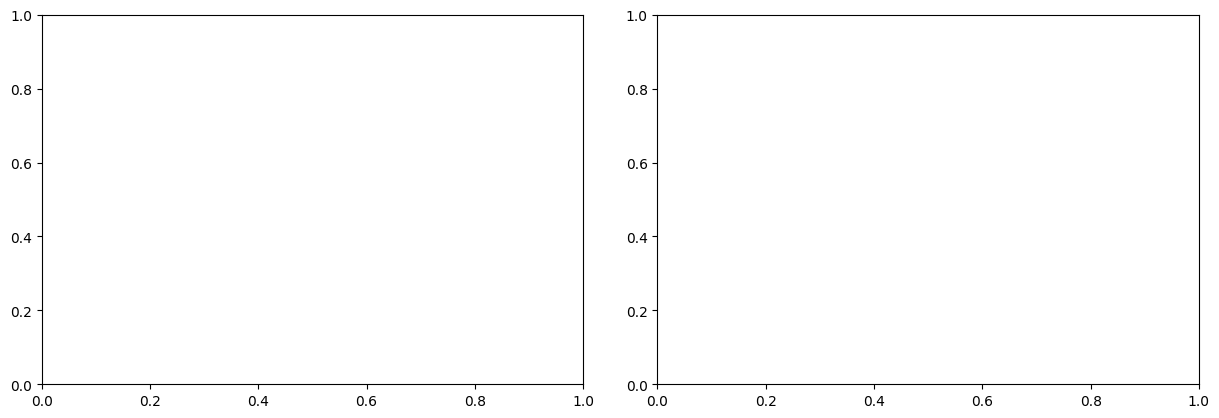

In [144]:
squidpy.pl.spatial_scatter(v, 
                           color=["IGKCd","TP53"],
                           #color=["IGKC"],
                           size=7,
                           #crop_coord=[(1800, 40000, 22680, 60000)],
                           #crop_coord=[(0,100,0,100)]
                          )

In [153]:
v.obs_vector('IGKC')

array([  1.,   6.,   2., ...,   4.,   2., 733.], dtype=float32)

In [147]:
v.obs_vector('TP53').shape

(137051,)

In [128]:
v.obsm.to_df()

,spatial1,spatial2
s_016um_00052_00082-1,45452.960133,19378.732750
s_016um_00010_00367-1,62067.494354,22056.099763
s_016um_00163_00399-1,64052.287036,13140.393176
s_016um_00238_00388-1,63466.128953,8750.779448
s_016um_00144_00175-1,50954.902483,14076.662842
...,...,...
s_016um_00375_00231-1,54402.279497,631.095991
s_016um_00109_00223-1,53731.043604,16158.540615
s_016um_00039_00175-1,50873.785496,20210.979756
s_016um_00037_00193-1,51923.519964,20341.922821


In [136]:
list(v.obsm.keys())[:10]

['spatial']

In [143]:
v.obsm.get('spatial')

array([[45452.96013311, 19378.73275021],
       [62067.4943537 , 22056.09976262],
       [64052.28703576, 13140.39317637],
       ...,
       [50873.78549578, 20210.9797556 ],
       [51923.51996361, 20341.92282103],
       [59948.8970146 , 14196.13270409]])

In [137]:
dir(v.obsm)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_actual_class',
 '_allow_df',
 '_axis',
 '_data',
 '_dimnames',
 '_ipython_key_completions_',
 '_parent',
 '_validate_value',
 '_view',
 '_view_class',
 'as_dict',
 'attrname',
 'axes',
 'clear',
 'copy',
 'dim',
 'dim_names',
 'flipped',
 'get',
 'is_view',
 'items',
 'keys',
 'parent',
 'pop',
 'popitem',
 'setdefault',
 'to_df',
 'update',
 'values']


| Bin Size (µm) | 8 µm | 16 µm |
| ------------- | ---- | ----- |
|Number of Bins Under Tissue | 545,913 | 137,051 |
|Mean UMI Counts per Bin | 488.4 | 1945.9 |
Mean Genes per Bin | 393.2 | 1274.8 |



In [1]:
import h5py
h5 = h5py.File('/home/cosmo/10x_spatial_AI/data/colon_cancer/binned_outputs/square_016um/filtered_feature_bc_matrix.h5')
h5.keys()

<KeysViewHDF5 ['matrix']>

In [51]:
h5['matrix'].keys()

<KeysViewHDF5 ['barcodes', 'data', 'features', 'indices', 'indptr', 'shape']>

In [3]:
M=h5['matrix']
M.keys()

<KeysViewHDF5 ['barcodes', 'data', 'features', 'indices', 'indptr', 'shape']>

In [58]:
# matrix has shape N_features/genes x N_bins ....
M['shape'][:]

array([ 18085, 137051], dtype=int32)

In [80]:
18085*137051 # = 2,478,567,335
# Full matrix has 2,478,567,335 cells
# but "data" is 174,718,343 values ... IE, sparse
174718343.0 / 2478567335.0

0.07049166691289425

In [78]:
for k in M.keys():
    try: print(k, M[k], M[k][:].min(), M[k][:].max())
    except: print(k, M[k])

barcodes <HDF5 dataset "barcodes": shape (137051,), type "|S21">
data <HDF5 dataset "data": shape (174718343,), type "<i4"> 1 4656
features <HDF5 group "/matrix/features" (6 members)>
indices <HDF5 dataset "indices": shape (174718343,), type "<i8"> 0 18084
indptr <HDF5 dataset "indptr": shape (137052,), type "<i8"> 0 174718343
shape <HDF5 dataset "shape": shape (2,), type "<i4"> 18085 137051


In [ ]:
'''
indices and data both have equal length
indices has a max val of 18k, which is feature space
data has a max value of 4656, which I suspect is counts

'''

In [57]:
# indptr contains num_bins integers, and looks like each points to entries in "data" or "indices"
M['indptr'][:].min(), M['indptr'][:].max()

(0, 174718343)

In [60]:
# this array, in turn, appears to point to feature(gene) numbers
M['indices'], M['indices'][0:5], M['indices'][:].max()

(<HDF5 dataset "indices": shape (174718343,), type "<i8">,
 array([  96, 1646, 1914, 2326, 2603]),
 18084)

In [4]:
for k in M['features'].keys():
    print(k, M['features'][k])


_all_tag_keys <HDF5 dataset "_all_tag_keys": shape (1,), type "|S6">
feature_type <HDF5 dataset "feature_type": shape (18085,), type "|S15">
genome <HDF5 dataset "genome": shape (18085,), type "|S6">
id <HDF5 dataset "id": shape (18085,), type "|S15">
name <HDF5 dataset "name": shape (18085,), type "|S11">
target_sets <HDF5 group "/matrix/features/target_sets" (1 members)>


In [18]:
feature_group = M['features']
tag_keys = getattr(feature_group, '_all_tag_keys').read()
tag_keys

AttributeError: 'Group' object has no attribute '_all_tag_keys'

In [8]:
for k in M['features']['_all_tag_keys'][:]:
    print(k)

b'genome'


In [21]:
import numpy
type(k)==numpy.bytes_

True

In [74]:
#weird
M['features']['target_sets']['Visium Human Transcriptome Probe Set v2.0']

<HDF5 dataset "Visium Human Transcriptome Probe Set v2.0": shape (18085,), type "|S5">

In [73]:
M['features']['target_sets']['Visium Human Transcriptome Probe Set v2.0'][10:15]

array([b'10', b'11', b'12', b'13', b'14'], dtype='|S5')

In [75]:
# so, given a bin in indptr, look up in indices the feature number, but this would only imply one gene per bin...
# indptr is a list of bins - each is associated with a location on the array underneath tissue
# the values in this list can map to both "indices" and "data"
# "indices" will further map to 18k gene names
# "data" maps to 

In [77]:
# data might be actual counts .... but if it is, isn't this only storing the counts for one gene per bin?
M['data'], M['data'][:].min(), M['data'][:].max()

(<HDF5 dataset "data": shape (174718343,), type "<i4">, 1, 4656)

In [63]:
M['barcodes'][0:5]

array([b's_016um_00052_00082-1', b's_016um_00010_00367-1',
       b's_016um_00163_00399-1', b's_016um_00238_00388-1',
       b's_016um_00144_00175-1'], dtype='|S21')

In [65]:
df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,s_016um_00000_00000-1,1,0,0,22352.723279,40624.276539
1,s_016um_00000_00001-1,1,0,1,22353.507390,40682.662627
2,s_016um_00000_00002-1,1,0,2,22354.291503,40741.048834
3,s_016um_00000_00003-1,1,0,3,22355.075617,40799.435159
4,s_016um_00000_00004-1,0,0,4,22355.859733,40857.821603
...,...,...,...,...,...,...
175556,s_016um_00418_00414-1,0,418,414,-1739.790645,65119.783034
175557,s_016um_00418_00415-1,0,418,415,-1739.031212,65178.179417
175558,s_016um_00418_00416-1,0,418,416,-1738.271778,65236.575919
175559,s_016um_00418_00417-1,0,418,417,-1737.512343,65294.972540


In [105]:
df.min(), df.max()

(barcode               s_016um_00000_00000-1
 in_tissue                                 0
 array_row                                 0
 array_col                                 0
 pxl_row_in_fullres             -2054.063134
 pxl_col_in_fullres             40624.276539
 dtype: object,
 barcode               s_016um_00418_00418-1
 in_tissue                                 1
 array_row                               418
 array_col                               418
 pxl_row_in_fullres             22680.620735
 pxl_col_in_fullres             65353.369279
 dtype: object)

In [101]:
df[df.array_row==383]

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
160477,s_016um_00383_00000-1,0,383,0,-11.688156,40926.290963
160478,s_016um_00383_00001-1,0,383,1,-10.927245,40984.641489
160479,s_016um_00383_00002-1,0,383,2,-10.166333,41042.992134
160480,s_016um_00383_00003-1,0,383,3,-9.405418,41101.342898
160481,s_016um_00383_00004-1,0,383,4,-8.644503,41159.693780
...,...,...,...,...,...,...
160891,s_016um_00383_00414-1,0,383,414,303.461269,65093.547945
160892,s_016um_00383_00415-1,0,383,415,304.222820,65151.947581
160893,s_016um_00383_00416-1,0,383,416,304.984373,65210.347336
160894,s_016um_00383_00417-1,0,383,417,305.745928,65268.747210


In [102]:
df[[
    'in_tissue','array_row'
]].value_counts()

in_tissue  array_row
1          153          419
           97           419
0          413          419
           412          419
           411          419
                       ... 
           175            2
           80             2
           180            1
           179            1
           178            1
Name: count, Length: 725, dtype: int64

In [ ]:
{
    "spot_diameter_fullres": 58.417196833905315,
    "bin_size_um": 16.0,
    "microns_per_pixel": 0.27389195078106876,
    "regist_target_img_scalef": 0.07973422,
    "tissue_lowres_scalef": 0.007973422,
    "fiducial_diameter_fullres": 1204.854684699297,
    "tissue_hires_scalef": 0.07973422
}

In [109]:
224/58

3.8620689655172415

In [106]:
df[df.in_tissue==1]

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,s_016um_00000_00000-1,1,0,0,22352.723279,40624.276539
1,s_016um_00000_00001-1,1,0,1,22353.507390,40682.662627
2,s_016um_00000_00002-1,1,0,2,22354.291503,40741.048834
3,s_016um_00000_00003-1,1,0,3,22355.075617,40799.435159
7,s_016um_00000_00007-1,1,0,7,22358.212091,41032.981648
...,...,...,...,...,...,...
164083,s_016um_00391_00254-1,1,391,254,-285.338795,55757.250510
164084,s_016um_00391_00255-1,1,391,255,-284.577975,55815.630416
175362,s_016um_00418_00220-1,1,418,220,-1887.091347,53793.129171
175363,s_016um_00418_00221-1,1,418,221,-1886.332213,53851.502537


In [123]:
v.obsm

AxisArrays with keys: spatial

In [104]:
df[df.in_tissue==1]['array_row'].value_counts()

array_row
153    419
106    419
108    419
109    419
110    419
      ... 
388     18
389     15
390     13
391      9
418      3
Name: count, Length: 393, dtype: int64

In [52]:
h5['matrix']['barcodes'], h5['matrix']['barcodes'][0]

(<HDF5 dataset "barcodes": shape (137051,), type "|S21">,
 b's_016um_00052_00082-1')

In [26]:
h5['matrix']['features'].keys()

<KeysViewHDF5 ['_all_tag_keys', 'feature_type', 'genome', 'id', 'name', 'target_sets']>

In [33]:
h5['matrix']['features']['name'], h5['matrix']['features']['name'][0:5]

(<HDF5 dataset "name": shape (37082,), type "|S256">,
 array([b'MIR1302-2HG', b'FAM138A', b'OR4F5', b'AL627309.1', b'AL627309.3'],
       dtype='|S256'))

In [34]:
h5['matrix']['data'], h5['matrix']['data'][0:5]

(<HDF5 dataset "data": shape (258755346,), type "<i4">,
 array([1, 1, 1, 1, 1], dtype=int32))

In [35]:
h5['matrix']['data'], h5['matrix']['data'][:].max()

(<HDF5 dataset "data": shape (258755346,), type "<i4">, 439)

In [37]:
h5['matrix']['data'], h5['matrix']['data'][:].min()

(<HDF5 dataset "data": shape (258755346,), type "<i4">, 1)

In [38]:
h5['matrix']['shape'], h5['matrix']['shape'][:]

(<HDF5 dataset "shape": shape (2,), type "<i4">,
 array([  37082, 9468111], dtype=int32))

In [70]:
37082*9468111

389800903766

In [39]:
h5['matrix']['indices']

<HDF5 dataset "indices": shape (258755346,), type "<i8">

<KeysViewHDF5 ['barcodes', 'data', 'features', 'indices', 'indptr', 'shape']>

barcodes <HDF5 dataset "barcodes": shape (9468111,), type "|S45">
data <HDF5 dataset "data": shape (258755346,), type "<i4">
features <HDF5 group "/matrix/features" (6 members)>
indices <HDF5 dataset "indices": shape (258755346,), type "<i8">
indptr <HDF5 dataset "indptr": shape (9468112,), type "<i8">
shape <HDF5 dataset "shape": shape (2,), type "<i4">


In [46]:
M['indptr'][0:5]

array([ 0,  3,  7,  8, 11])